In [51]:
from pinn_magnetic_experimental import MultiPoleModel
import smtf_utility as util

In [52]:
sim = util.bf_simulator([1, 1.33, 1.66, 1.99], 30, scale=1e9)
sim.add_dipole(0.5, 0,0,1,0,0)
sim.add_dipole(0,0.25,0,0,2,0)
sim.add_dipole(0,0,.15,0,0,3)

In [53]:
positions, values = sim.get_data()
#positions, values, old_calc = util.parse_mtf("tests\ATMS\Test 4.mtf", scaled=False)

In [54]:
#model = MultiDipoleModel(poles=4, lrate=0.001, optimizer='adam', loss='mse', scale=1e9)
model = MultiPoleModel(moments=3, lrate=.09, optimizer='adagrad', loss='mse', scale=1e9, early_stop=False, target_stop=1)
test_epochs = 1500

In [55]:
model.fit(positions, values, epochs=test_epochs)

epoch  0 --- Loss --- 27531.414
epoch  1 --- Loss --- 20091.602
epoch  2 --- Loss --- 16431.207
epoch  3 --- Loss --- 13275.788
epoch  4 --- Loss --- 10601.195
epoch  5 --- Loss --- 8120.6733
epoch  6 --- Loss --- 5946.795
epoch  7 --- Loss --- 4578.6167
epoch  8 --- Loss --- 3789.9312
epoch  9 --- Loss --- 3252.033
epoch  10 --- Loss --- 2856.9595
epoch  11 --- Loss --- 2562.7112
epoch  12 --- Loss --- 2336.7305
epoch  13 --- Loss --- 2157.4944
epoch  14 --- Loss --- 2010.5999
epoch  15 --- Loss --- 1886.5577
epoch  16 --- Loss --- 1779.2675
epoch  17 --- Loss --- 1684.6259
epoch  18 --- Loss --- 1599.9299
epoch  19 --- Loss --- 1523.2365
epoch  20 --- Loss --- 1453.1931
epoch  21 --- Loss --- 1388.7672
epoch  22 --- Loss --- 1329.1814
epoch  23 --- Loss --- 1273.8333
epoch  24 --- Loss --- 1222.2274
epoch  25 --- Loss --- 1173.9694
epoch  26 --- Loss --- 1128.7262
epoch  27 --- Loss --- 1086.2228
epoch  28 --- Loss --- 1046.2188
epoch  29 --- Loss --- 1008.5041
epoch  30 --- Loss ---

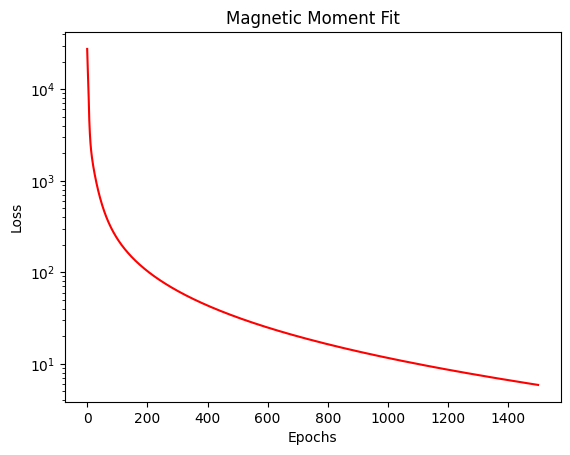

In [56]:
import matplotlib.pyplot as plt


y_axis = model.loss_history
x_axis = [*range(0, len(y_axis), 1)]

plt.plot(x_axis, y_axis, 'r-')
plt.yscale("log")
#plt.xscale("log")
plt.title('Magnetic Moment Fit')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [57]:
model.dipole()

array([[1.5220027, 2.2072954, 3.1212318]], dtype=float32)

In [58]:
model.moment()

---- Moment  0 -----
Position:  [[ 5.0916362e-01 -7.0181387e-03  4.4832547e-04]]
Value:     [[ 0.91669667  0.04012084 -0.00871256]]
---- Moment  1 -----
Position:  [[-0.00379844 -0.02076641  0.1481867 ]]
Value:     [[0.11526647 0.24917445 2.7913067 ]]
---- Moment  2 -----
Position:  [[-0.0061631   0.27490133 -0.01908152]]
Value:     [[-0.00916247  1.6708834   0.20908432]]
